In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# 한글 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'		# window용
# matplotlib.rcParams['font.family'] = 'AppleGothic'			# mac용
# fontsize
matplotlib.rcParams['font.size'] = 13
# 그래프에 - 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

In [129]:
# df = pd.read_excel('score.xlsx',index_col='지원번호')
df = pd.read_csv('drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [130]:
# 대륙별 나라 개수
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [131]:
df['continent'].unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

In [132]:
# total_servings 컬럼 만들어서
# 대륙별 total_servings를 원 그래프로 출력하시오.

In [133]:
df['total_servings'] = df['beer_servings']+df['spirit_servings']+df['wine_servings']
df

df['continent'].fillna('OT',inplace=True)
df.groupby('continent')['total_servings'].sum()

C:\Users\KOSMO\AppData\Local\Temp\ipykernel_1496\4274265050.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['continent'].fillna('OT',inplace=True)


continent
AF     4986
AS     4706
EU    21085
OC     2940
OT     7721
SA     4227
Name: total_servings, dtype: int64

In [134]:
df.groupby('continent')['total_servings'].sum().index

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

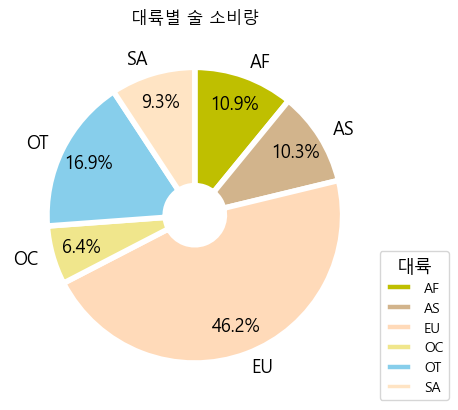

In [135]:
values = df.groupby('continent')['total_servings'].sum()
labels = df.groupby('continent')['total_servings'].sum().index
colors = ['y','tan','peachpuff','khaki','skyblue','bisque']
wedgeprops = {'width':0.8,'edgecolor':'white','linewidth':4}

plt.title('대륙별 술 소비량',size=12)

plt.pie(values,labels=labels,colors=colors,startangle=90,counterclock=False,autopct='%.1f%%',wedgeprops=wedgeprops,pctdistance=0.8)

plt.legend(fontsize=10,loc=(1,0),title='대륙')

plt.show()

In [136]:
## 전체 평균 보다 많은 알콜 도수를 섭취하는 대륙을 출력하시오.

avg = df['total_litres_of_pure_alcohol'].mean()
df.groupby('continent')['total_litres_of_pure_alcohol'].mean()

filt = df.groupby('continent')['total_litres_of_pure_alcohol'].mean() > avg

df.groupby('continent')['total_litres_of_pure_alcohol'].mean()[filt]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [137]:
# beer_servings가 가장 높은 대륙

df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False)
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False).head(1)
df.groupby('continent')['beer_servings'].mean().max()		 # - index의 값 출력
df.groupby('continent')['beer_servings'].mean().idxmax() # - index 출력


'EU'

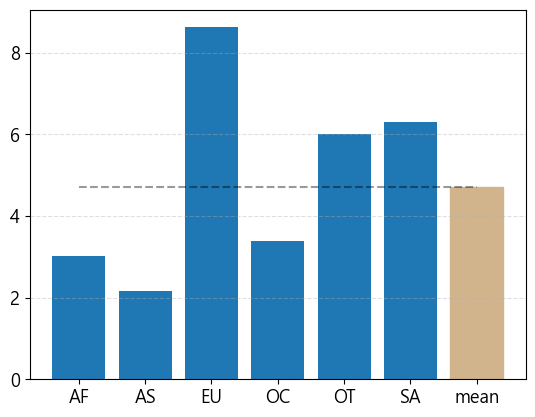

In [186]:
# 대륙별  total_litres_of_pure_alcohol 평균을 막대그래프로, 마지막은 전체 평균 막대그래프

# df.groupby('continent')['total_litres_of_pure_alcohol'].sum()

data = df['total_litres_of_pure_alcohol'].mean()
con_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
n_data = [data]*7

con_df['mean'] = data
con_df
con_df.index

con_bar = plt.bar(con_df.index,con_df)
# 마지막 그래프 색 변경
# plt.bar(con_df.index,con_df)[len(con_df)-1].set_color('red')
con_bar[len(con_df)-1].set_color('tan')

plt.plot(con_df.index,n_data, color = 'black', alpha=0.4, ls='--')

# 격자선
plt.grid(axis='y',ls='--',alpha=0.4)